In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')


In [11]:
data= pd.read_csv('loan_approval_dataset.csv')
data.head()

Unnamed: 0.11  Unnamed: 0.10  Unnamed: 0.9  Unnamed: 0.8  Unnamed: 0.7  \
0              0              0             0             0             0   
1              1              1             1             1             1   
2              2              2             2             2             2   
3              3              3             3             3             3   
4              4              4             4             4             4   

   Unnamed: 0.6  Unnamed: 0.5  Unnamed: 0.4  Unnamed: 0.3  Unnamed: 0.2  ...  \
0             0             0             0             0             0  ...   
1             1             1             1             1             1  ...   
2             2             2             2             2             2  ...   
3             3             3             3             3             3  ...   
4             4             4             4             4             4  ...   

   self_employed  income_annum  loan_amount  loan_term  cibil_score  \
0              0       9600000     29900000         12          778   
1              1       4100000     12200000          8          417   
2              0       9100000     29700000         20          506   
3              0       8200000     30700000          8          467   
4              1       9800000     24200000         20          382   

   residential_assets_value  commercial_assets_value  luxury_assets_value  \
0                   2400000                 17600000             22700000   
1                   2700000                  2200000              8800000   
2                   7100000                  4500000             33300000   
3                  18200000                  3300000             23300000   
4                  12400000                  8200000             29400000   

   bank_asset_value  loan_status  
0           8000000            0  
1           3300000            1  
2          12800000            1  
3           7900000            1  
4           5000000            1  

[5 rows x 24 columns]

In [12]:
print("Shape:", data.shape)
print("Columns:", data.columns.tolist())
data.info()
data.describe()
data.isnull().sum()

Shape: (4269, 24)
Columns: ['Unnamed: 0.11', 'Unnamed: 0.10', 'Unnamed: 0.9', 'Unnamed: 0.8', 'Unnamed: 0.7', 'Unnamed: 0.6', 'Unnamed: 0.5', 'Unnamed: 0.4', 'Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'loan_status']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Unnamed: 0.11             4269 non-null   int64
 1   Unnamed: 0.10             4269 non-null   int64
 2   Unnamed: 0.9              4269 non-null   int64
 3   Unnamed: 0.8              4269 non-null   int64
 4   Unnamed: 0.7              4269 non-null   int64
 5   Unnamed: 0.6              4269 non-null   int64
 6   Unnamed: 0.5          

Unnamed: 0.11               0
Unnamed: 0.10               0
Unnamed: 0.9                0
Unnamed: 0.8                0
Unnamed: 0.7                0
Unnamed: 0.6                0
Unnamed: 0.5                0
Unnamed: 0.4                0
Unnamed: 0.3                0
Unnamed: 0.2                0
Unnamed: 0.1                0
Unnamed: 0                  0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

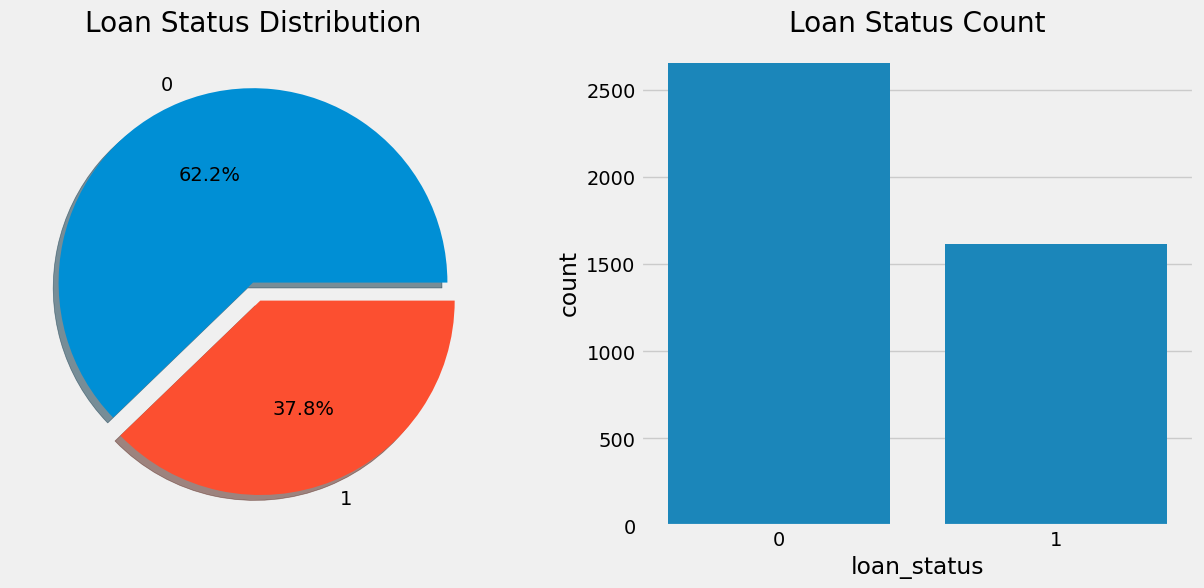

In [13]:
f, ax = plt.subplots(1, 2, figsize=(14, 6))
data['loan_status'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Loan Status Distribution')
ax[0].set_ylabel('')
sns.countplot(x='loan_status', data=data, ax=ax[1])
ax[1].set_title('Loan Status Count')
plt.show()

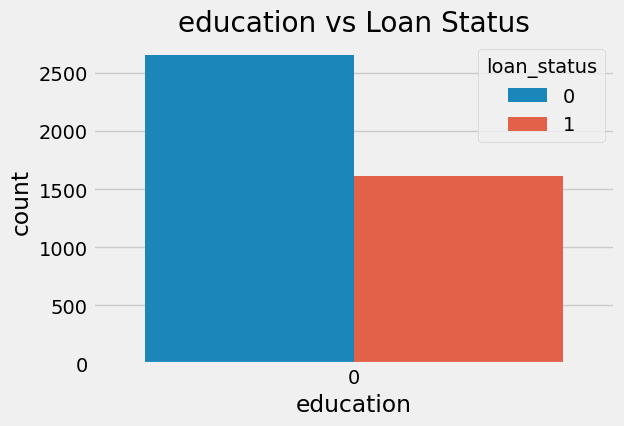

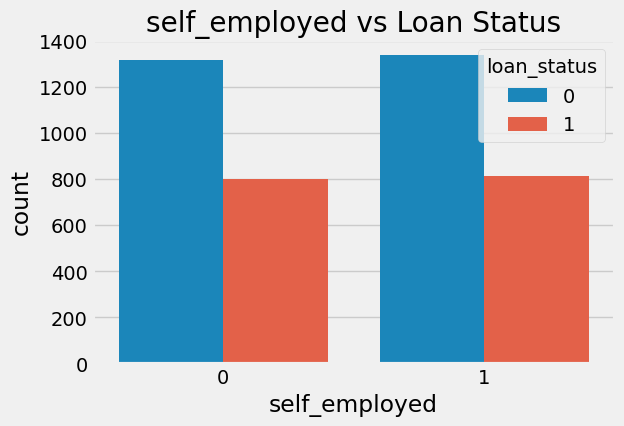

In [14]:
categorical = ['education', 'self_employed']
for col in categorical:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue='loan_status', data=data)
    plt.title(f'{col} vs Loan Status')
    plt.show()

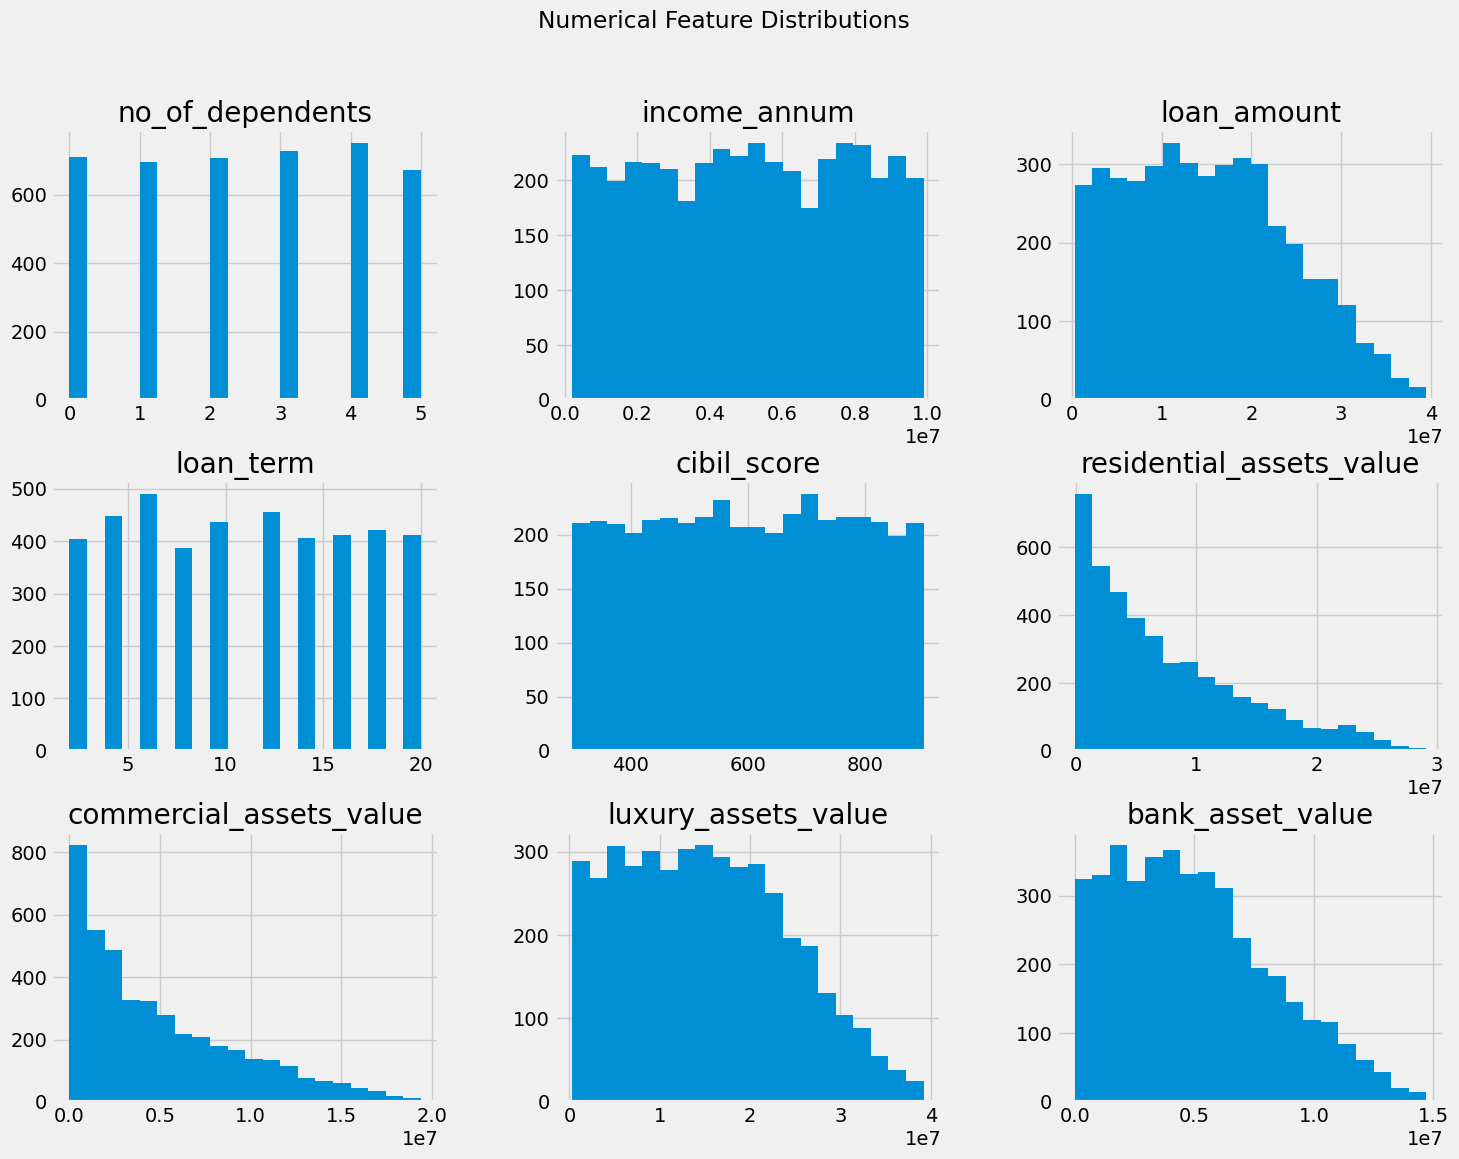

In [15]:
numerical = [
    'no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
    'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value'
]
data[numerical].hist(figsize=(16, 12), bins=20)
plt.suptitle('Numerical Feature Distributions')
plt.show()

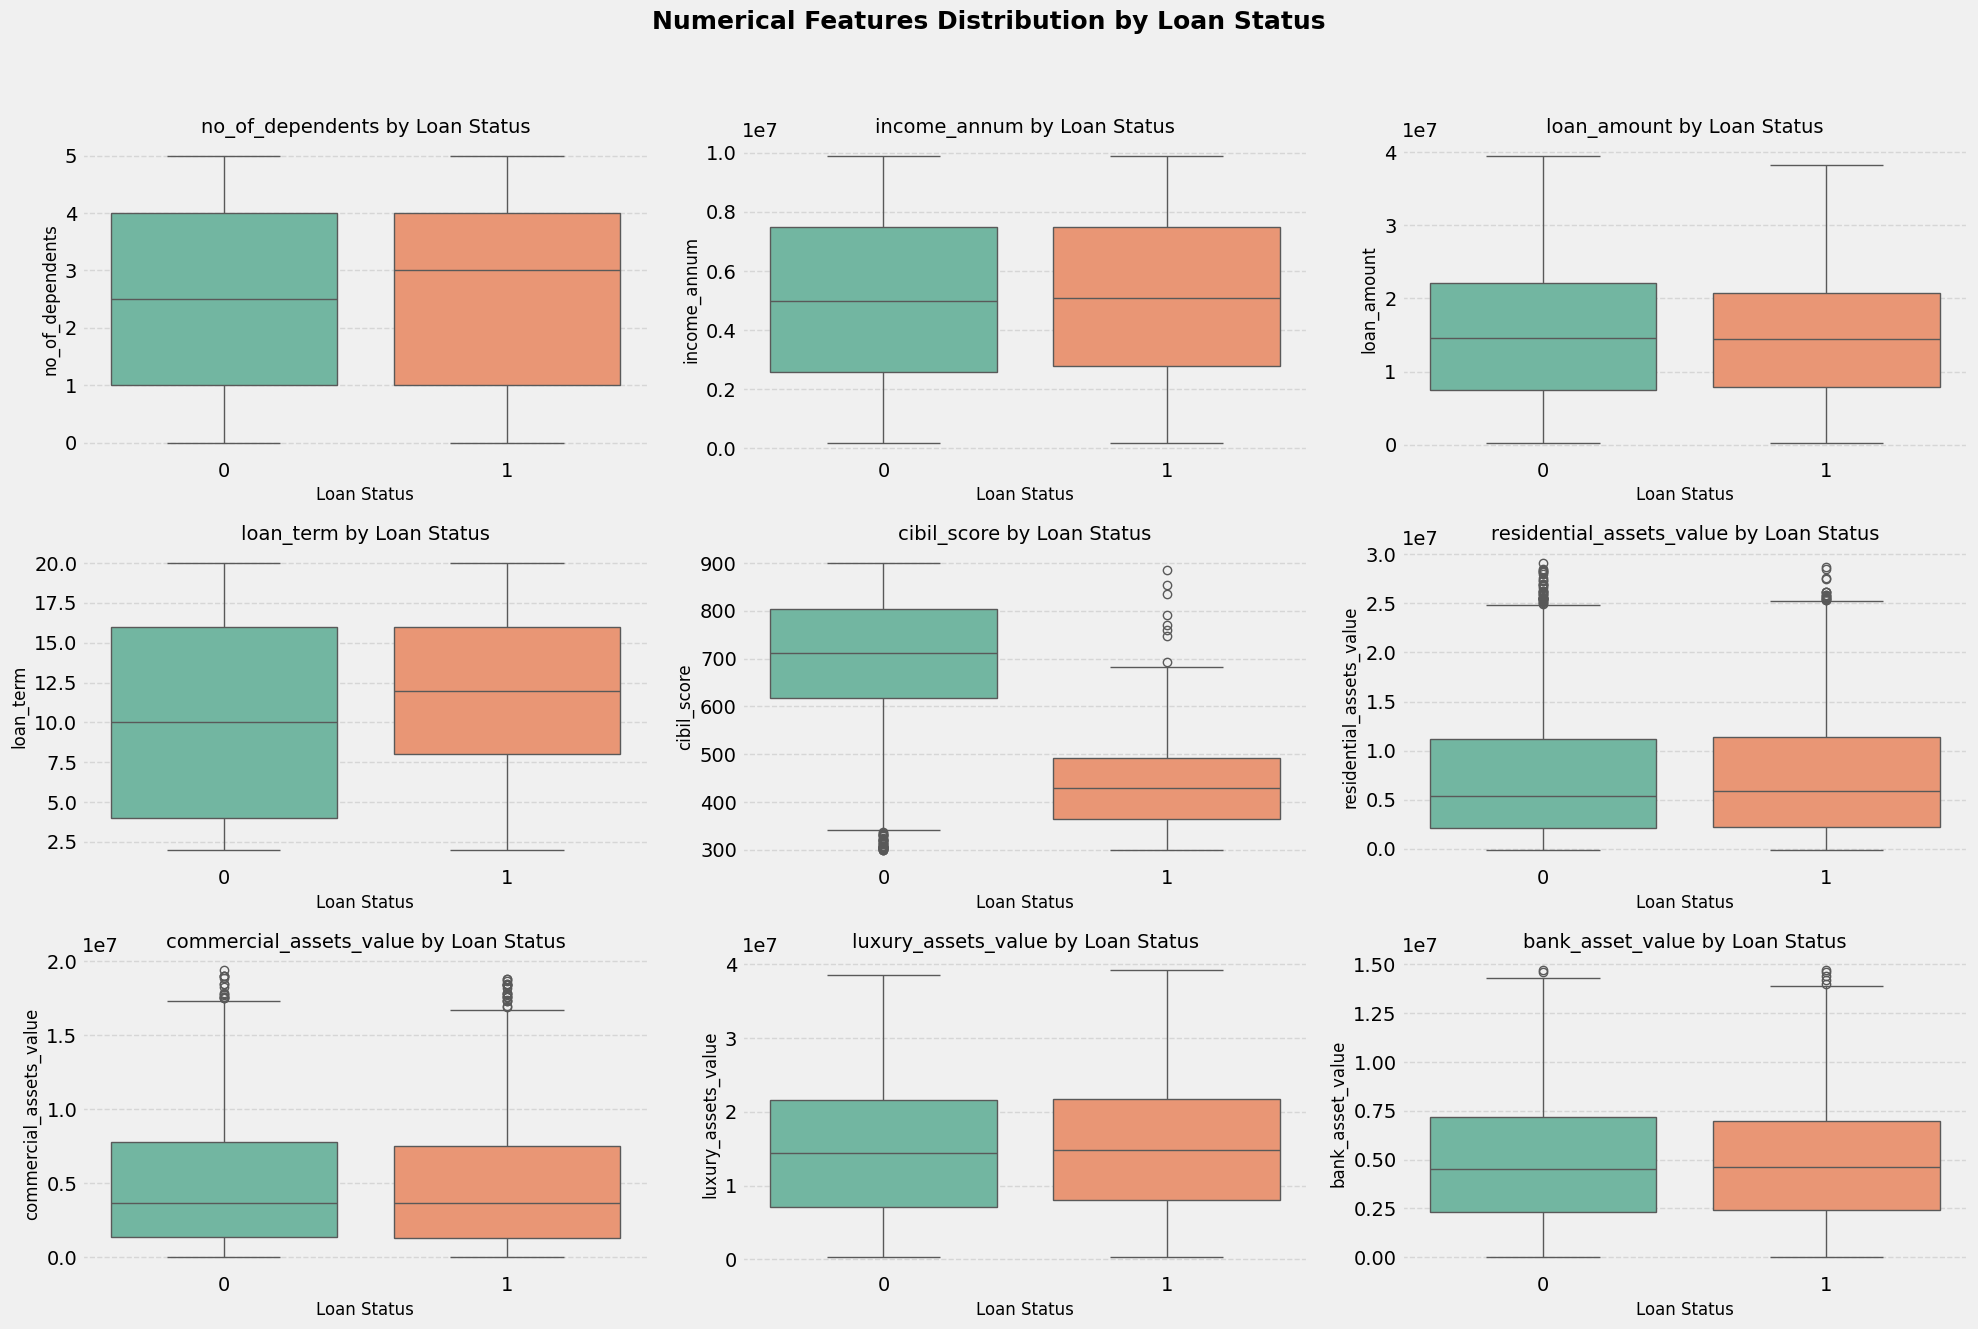

In [16]:
plt.figure(figsize=(20, 14))
for idx, col in enumerate(numerical, 1):
    plt.subplot(3, 3, idx)
    sns.boxplot(x='loan_status', y=col, data=data, palette='Set2', showfliers=True)
    plt.title(f'{col} by Loan Status', fontsize=14)
    plt.xlabel('Loan Status', fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.suptitle('Numerical Features Distribution by Loan Status', fontsize=18, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

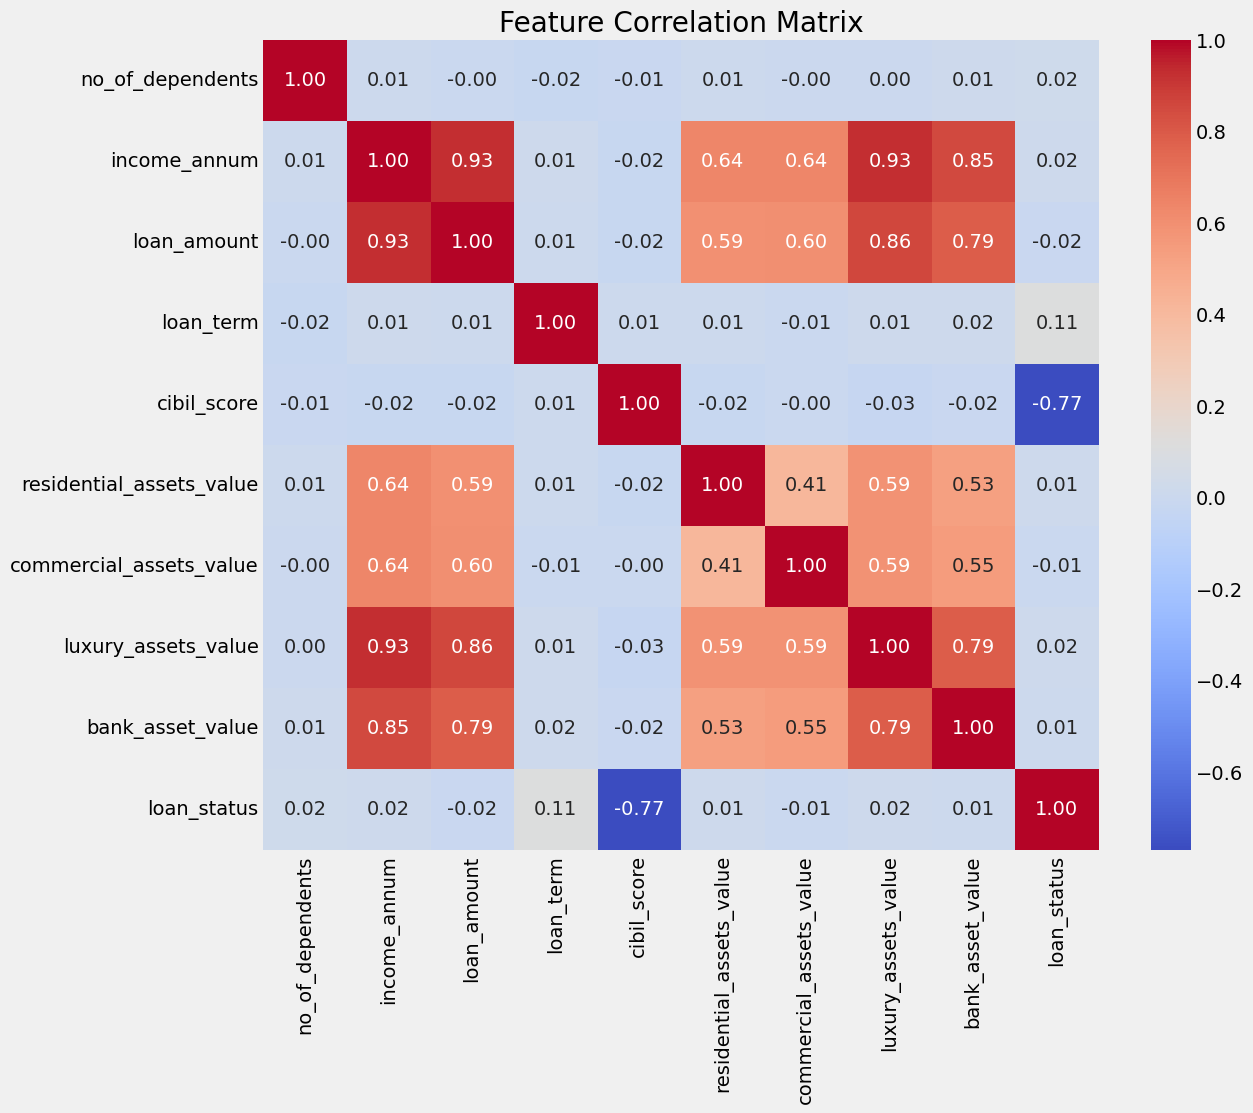

In [17]:
plt.figure(figsize=(12, 10))
corr = data[numerical + ['loan_status']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

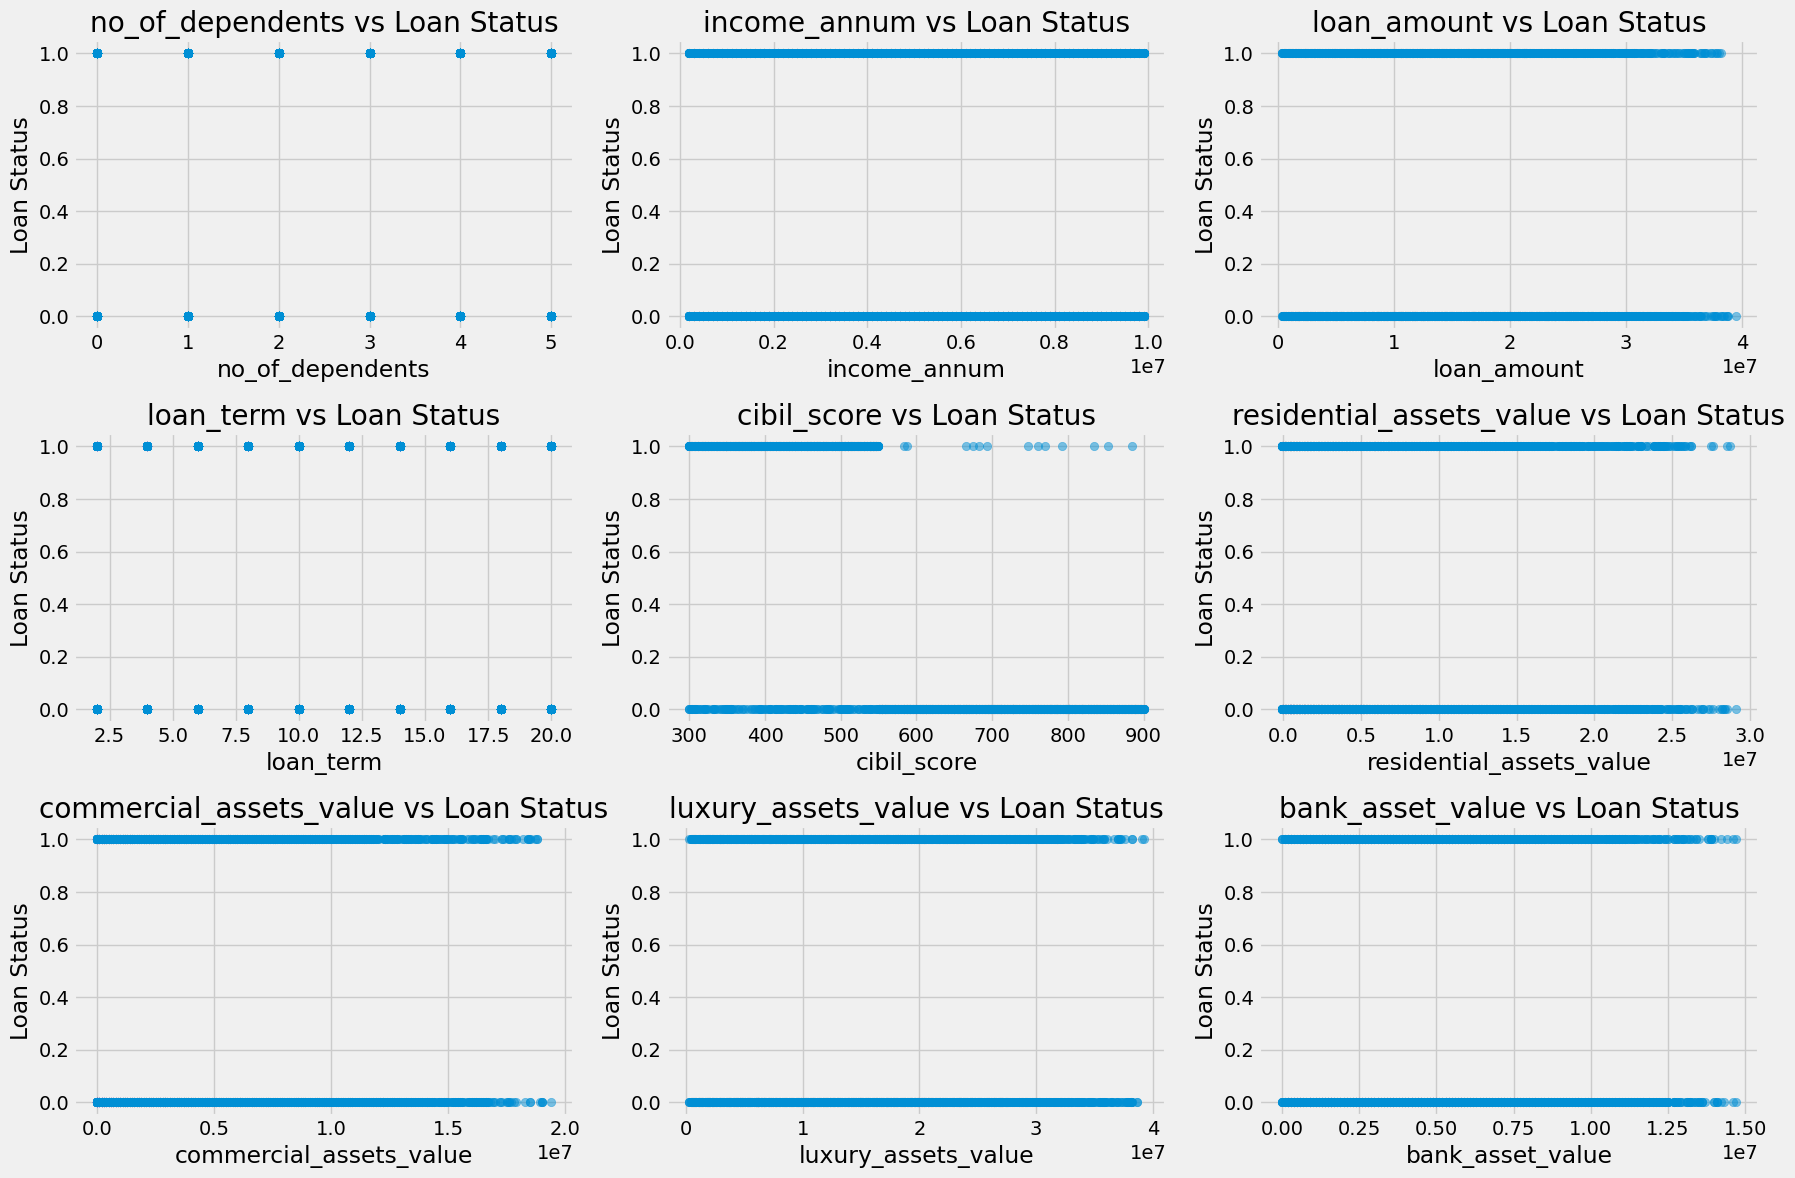

In [18]:
plt.figure(figsize=(18, 12))
for idx, col in enumerate(numerical, 1):
    plt.subplot(3, 3, idx)
    plt.scatter(data[col], data['loan_status'], alpha=0.5)
    plt.xlabel(col)
    plt.ylabel('Loan Status')
    plt.title(f'{col} vs Loan Status')
plt.tight_layout()
plt.show()

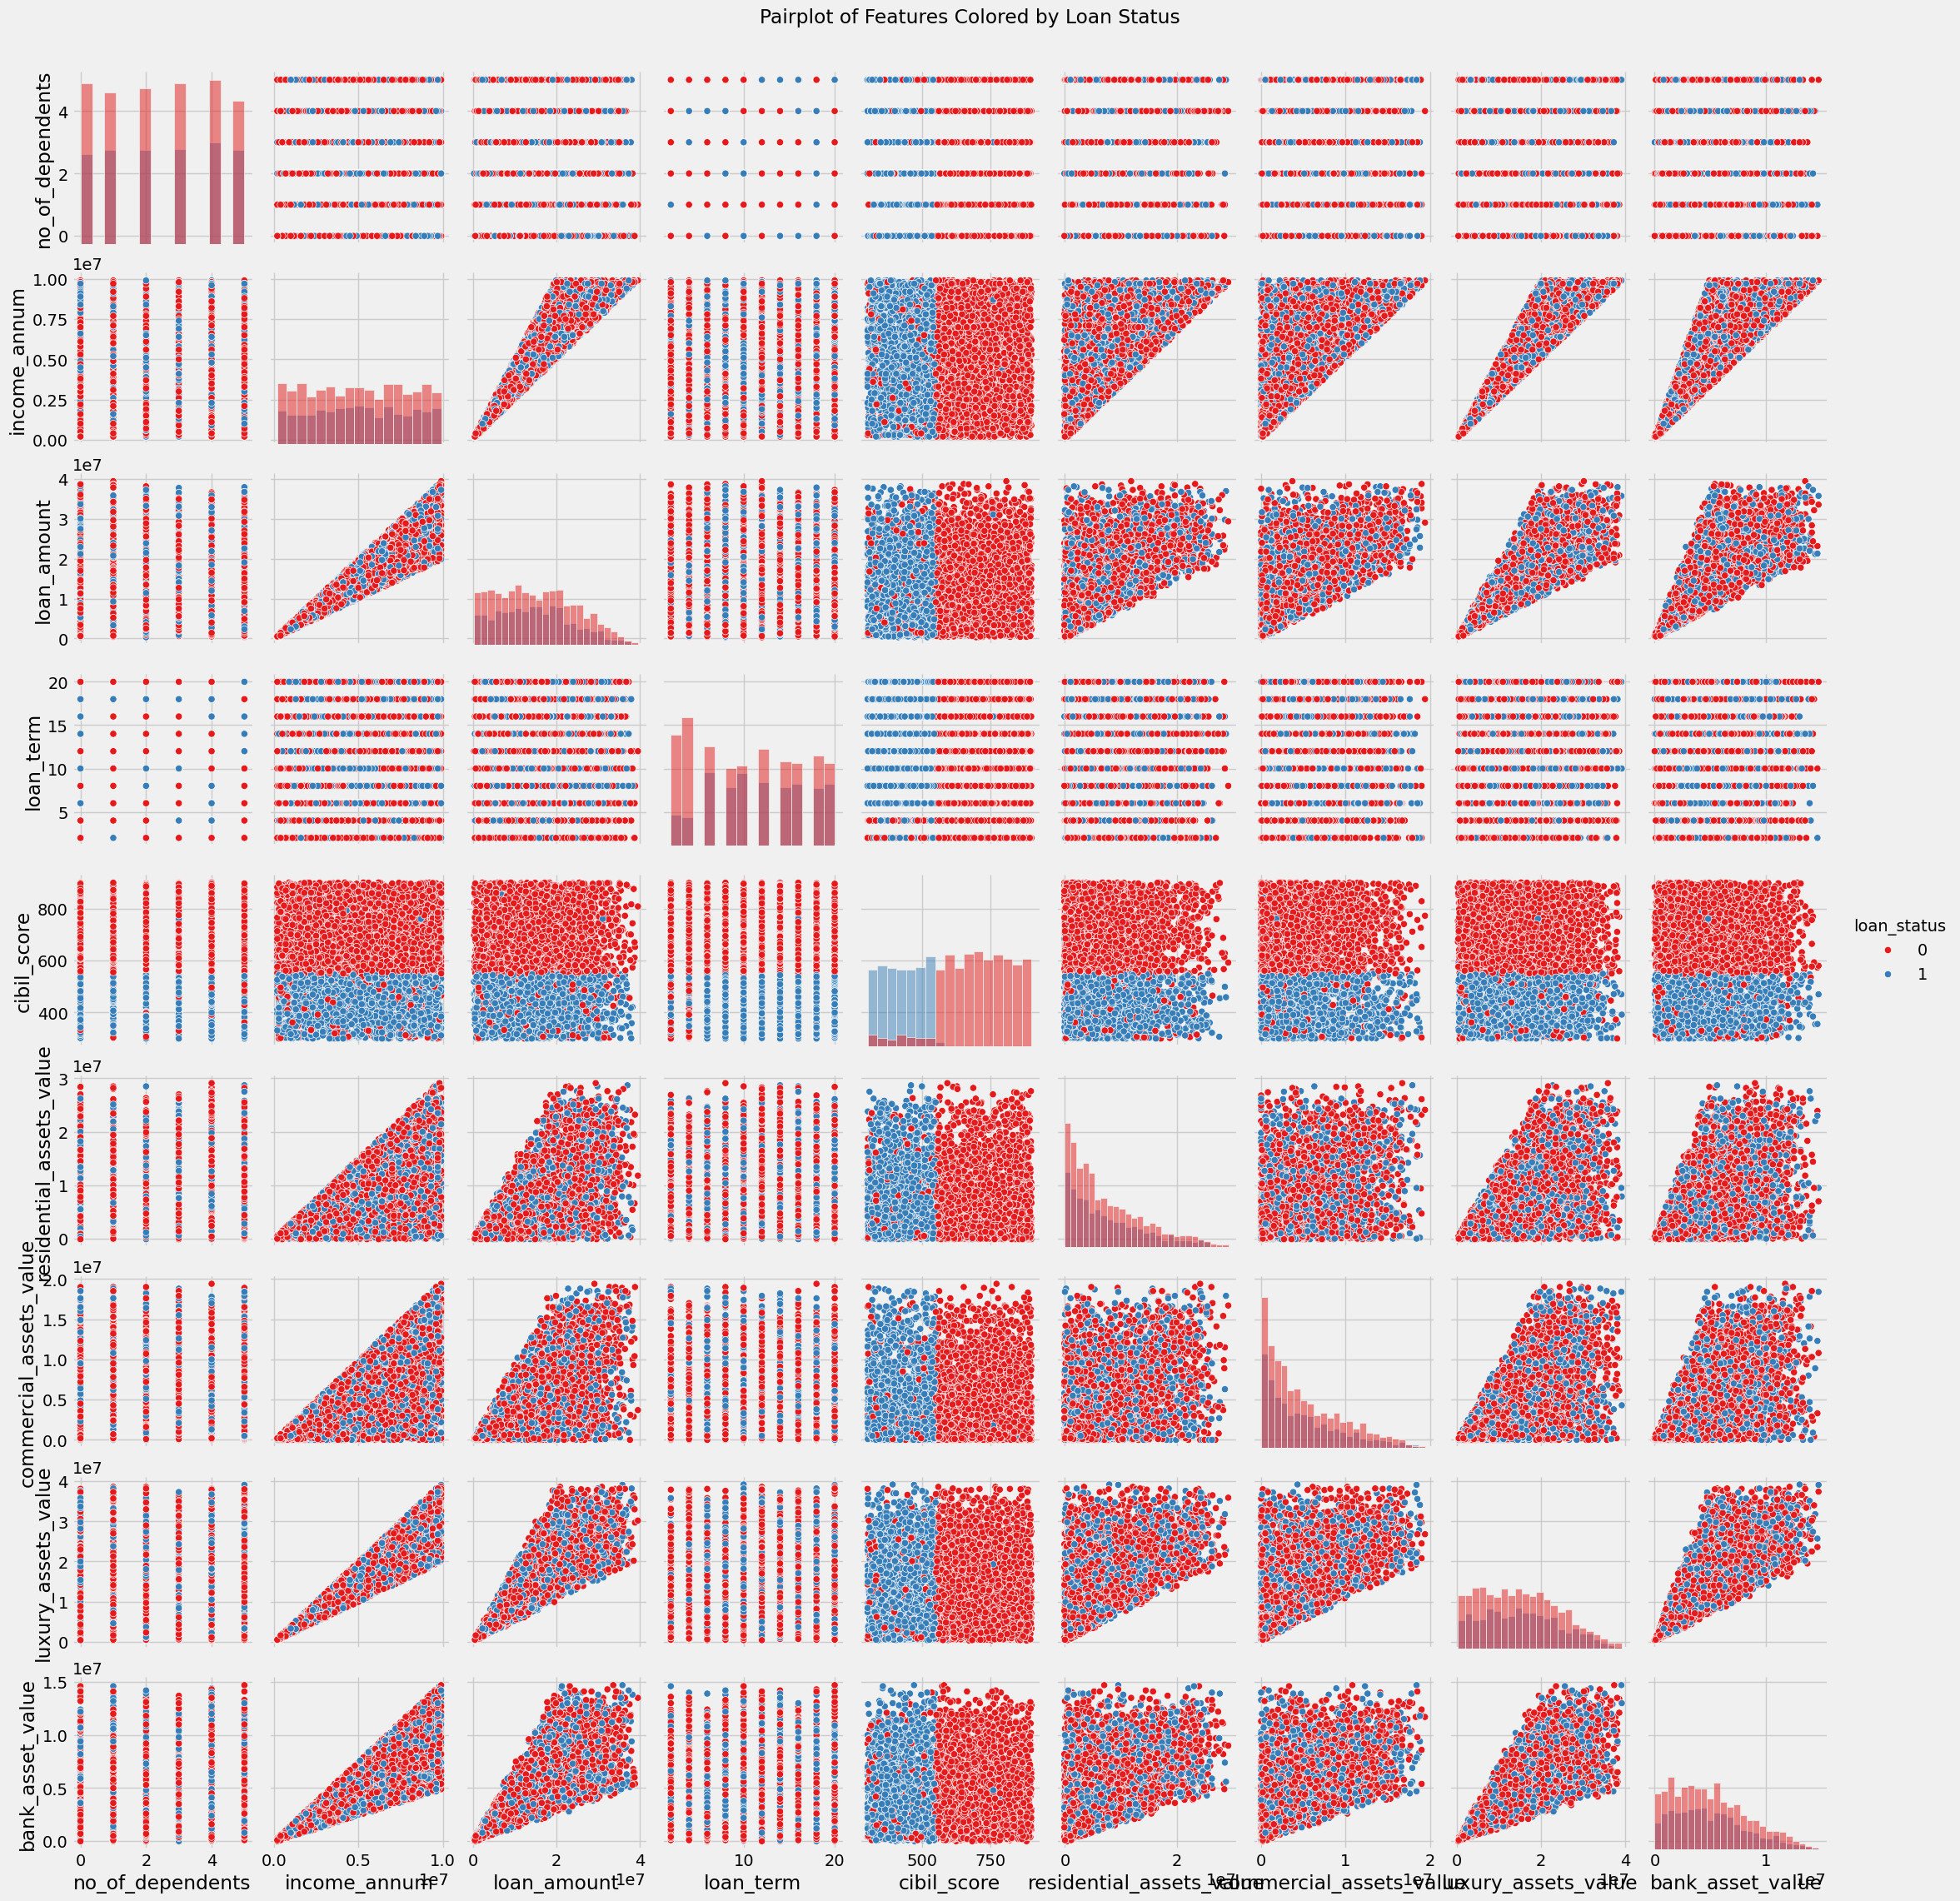

In [19]:
sns.pairplot(data[numerical + ['loan_status']], hue='loan_status', diag_kind='hist', palette='Set1')
plt.suptitle('Pairplot of Features Colored by Loan Status', y=1.02)
plt.show()

In [20]:
data.columns
data.columns = data.columns.str.strip()

In [21]:
label_Data=['education', 'self_employed', 'loan_status']
labEn = LabelEncoder()
for column in label_Data:
    data[column]=labEn.fit_transform(data[column])
data['loan_status'] = data['loan_status'].replace({ 'Approved' : 0 ,  'Rejected' : 1})
data['education'] = data['education'].replace({ 'Graduate' : 1 ,  ' Not Graduate' : 0})
data['self_employed'] = data['self_employed'].replace({ 'No' : 0 ,  'Yes' : 1})

In [22]:
data

Unnamed: 0.11  Unnamed: 0.10  Unnamed: 0.9  Unnamed: 0.8  Unnamed: 0.7  \
0                 0              0             0             0             0   
1                 1              1             1             1             1   
2                 2              2             2             2             2   
3                 3              3             3             3             3   
4                 4              4             4             4             4   
...             ...            ...           ...           ...           ...   
4264           4264           4264          4264          4264          4264   
4265           4265           4265          4265          4265          4265   
4266           4266           4266          4266          4266          4266   
4267           4267           4267          4267          4267          4267   
4268           4268           4268          4268          4268          4268   

      Unnamed: 0.6  Unnamed: 0.5  Unnamed: 0.4  Unnamed: 0.3  Unnamed: 0.2  \
0                0             0             0             0             0   
1                1             1             1             1             1   
2                2             2             2             2             2   
3                3             3             3             3             3   
4                4             4             4             4             4   
...            ...           ...           ...           ...           ...   
4264          4264          4264          4264          4264          4264   
4265          4265          4265          4265          4265          4265   
4266          4266          4266          4266          4266          4266   
4267          4267          4267          4267          4267          4267   
4268          4268          4268          4268          4268          4268   

      ...  self_employed  income_annum  loan_amount  loan_term  cibil_score  \
0     ...              0       9600000     29900000         12          778   
1     ...              1       4100000     12200000          8          417   
2     ...              0       9100000     29700000         20          506   
3     ...              0       8200000     30700000          8          467   
4     ...              1       9800000     24200000         20          382   
...   ...            ...           ...          ...        ...          ...   
4264  ...              1       1000000      2300000         12          317   
4265  ...              1       3300000     11300000         20          559   
4266  ...              0       6500000     23900000         18          457   
4267  ...              0       4100000     12800000          8          780   
4268  ...              0       9200000     29700000         10          607   

      residential_assets_value  commercial_assets_value  luxury_assets_value  \
0                      2400000                 17600000             22700000   
1                      2700000                  2200000              8800000   
2                      7100000                  4500000             33300000   
3                     18200000                  3300000             23300000   
4                     12400000                  8200000             29400000   
...                        ...                      ...                  ...   
4264                   2800000                   500000              3300000   
4265                   4200000                  2900000             11000000   
4266                   1200000                 12400000             18100000   
4267                   8200000                   700000             14100000   
4268                  17800000                 11800000             35700000   

      bank_asset_value  loan_status  
0              8000000            0  
1              3300000            1  
2             12800000            1  
3              7900000            1  
4       

In [23]:
data.to_csv("loan_approval_dataset.csv", index=True)
x_train=data[['no_of_dependents','self_employed','income_annum','loan_amount',
       'loan_term','cibil_score','residential_assets_value','commercial_assets_value',
       'luxury_assets_value','bank_asset_value']].values
y_train= data['loan_status'].values
nb_training , nb_features = x_train.shape

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [24]:
x_train.shape , y_train.shape 

((4269, 10), (4269,))

In [25]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Unnamed: 0.11             4269 non-null   int64
 1   Unnamed: 0.10             4269 non-null   int64
 2   Unnamed: 0.9              4269 non-null   int64
 3   Unnamed: 0.8              4269 non-null   int64
 4   Unnamed: 0.7              4269 non-null   int64
 5   Unnamed: 0.6              4269 non-null   int64
 6   Unnamed: 0.5              4269 non-null   int64
 7   Unnamed: 0.4              4269 non-null   int64
 8   Unnamed: 0.3              4269 non-null   int64
 9   Unnamed: 0.2              4269 non-null   int64
 10  Unnamed: 0.1              4269 non-null   int64
 11  Unnamed: 0                4269 non-null   int64
 12  no_of_dependents          4269 non-null   int64
 13  education                 4269 non-null   int64
 14  self_employed             4269 non-null 

Unnamed: 0.11  Unnamed: 0.10  Unnamed: 0.9  Unnamed: 0.8  Unnamed: 0.7  \
count    4269.000000    4269.000000   4269.000000   4269.000000   4269.000000   
mean     2134.000000    2134.000000   2134.000000   2134.000000   2134.000000   
std      1232.498479    1232.498479   1232.498479   1232.498479   1232.498479   
min         0.000000       0.000000      0.000000      0.000000      0.000000   
25%      1067.000000    1067.000000   1067.000000   1067.000000   1067.000000   
50%      2134.000000    2134.000000   2134.000000   2134.000000   2134.000000   
75%      3201.000000    3201.000000   3201.000000   3201.000000   3201.000000   
max      4268.000000    4268.000000   4268.000000   4268.000000   4268.000000   

       Unnamed: 0.6  Unnamed: 0.5  Unnamed: 0.4  Unnamed: 0.3  Unnamed: 0.2  \
count   4269.000000   4269.000000   4269.000000   4269.000000   4269.000000   
mean    2134.000000   2134.000000   2134.000000   2134.000000   2134.000000   
std     1232.498479   1232.498479   1232.498479   1232.498479   1232.498479   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%     1067.000000   1067.000000   1067.000000   1067.000000   1067.000000   
50%     2134.000000   2134.000000   2134.000000   2134.000000   2134.000000   
75%     3201.000000   3201.000000   3201.000000   3201.000000   3201.000000   
max     4268.000000   4268.000000   4268.000000   4268.000000   4268.000000   

       ...  self_employed  income_annum   loan_amount    loan_term  \
count  ...    4269.000000  4.269000e+03  4.269000e+03  4269.000000   
mean   ...       0.503631  5.059124e+06  1.513345e+07    10.900445   
std    ...       0.500045  2.806840e+06  9.043363e+06     5.709187   
min    ...       0.000000  2.000000e+05  3.000000e+05     2.000000   
25%    ...       0.000000  2.700000e+06  7.700000e+06     6.000000   
50%    ...       1.000000  5.100000e+06  1.450000e+07    10.000000   
75%    ...       1.000000  7.500000e+06  2.150000e+07    16.000000   
max    ...       1.000000  9.900000e+06  3.950000e+07    20.000000   

       cibil_score  residential_assets_value  commercial_assets_value  \
count  4269.000000              4.269000e+03             4.269000e+03   
mean    599.936051              7.472617e+06             4.973155e+06   
std     172.430401              6.503637e+06             4.388966e+06   
min     300.000000             -1.000000e+05             0.000000e+00   
25%     453.000000              2.200000e+06             1.300000e+06   
50%     600.000000              5.600000e+06             3.700000e+06   
75%     748.000000              1.130000e+07             7.600000e+06   
max     900.000000              2.910000e+07             1.940000e+07   

       luxury_assets_value  bank_asset_value  loan_status  
count         4.269000e+03      4.269000e+03  4269.000000  
mean          1.512631e+07      4.976692e+06     0.377840  
std           9.103754e+06      3.250185e+06     0.484904  
min           3.000000e+05      0.000000e+00     0.000000  
25%           7.500000e+06      2.300000e+06     0.000000  
50%           1.460000e+07      4.600000e+06     0.000000  
75%           2.170000e+07      7.100000e+06     1.000000  
max           3.920000e+07      1.470000e+07     1.000000  

[8 rows x 24 columns]

In [26]:
def sigmoid(z):
    z = np.clip(z, -500, 500)
    return 1/(1+np.exp(-z))

In [27]:
def cost(x,y,w,b):
    nb_training = x.shape[0]
    sumCost=0
    eps = 1e-15
    

    for i in range (nb_training):
        z=np.dot(x[i],w)+b
        g=sigmoid(z)
        g = np.clip(g, eps, 1 - eps)
        sumCost +=(-y[i]*np.log(g) - (1-y[i])*np.log(1-g) )
    return 1/nb_training * sumCost

In [28]:
def gradient(x,y,w,b):
    gra_w = np.zeros(nb_features)
    gra_b = 0
    
    for i in range(nb_training):
        z=np.dot(x[i],w)+b
        g=sigmoid(z)
        
        gra_b += (g-y[i])
        for j in range(nb_features):
            gra_w[j] += (g-y[i])*x[i,j]
    gra_w = gra_w/nb_training
    gra_b = gra_b/nb_training
    
    return gra_w , gra_b   
        

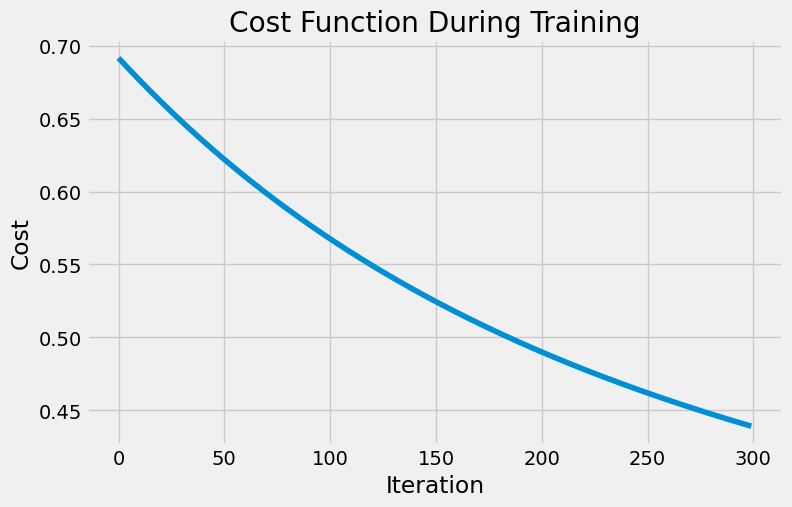

In [29]:
def GradientDescent(x, y, alpha, iterrations):
    w = np.zeros(nb_features)
    b = 0
    cost_history = []
    for i in range(iterrations):
        gra_w, gra_b = gradient(x, y, w, b)
        w = w - alpha * gra_w
        b = b - alpha * gra_b
        current_cost = cost(x, y, w, b)
        cost_history.append(current_cost)
    return w, b, cost_history


alpha = 0.01
iterrations = 300

best_w, best_b, cost_history = GradientDescent(x_train, y_train, alpha, iterrations)

plt.figure(figsize=(8, 5))
plt.plot(range(iterrations), cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost Function During Training')
plt.show()

In [31]:
def Prediction(x,w,b):
    y_predicted = np.zeros(nb_training)
    
    for i in range(nb_training):
        z=np.dot(x[i],w)+b
        g=sigmoid(z)
        
        if g >=0.5 :
            y_predicted[i]==1
            print(f'Loan is approved for {i}th person')
        else:
            y_predicted[i]==0
            print(f'Loan is rejected for {i}th person')
    return y_predicted 

predictions = Prediction(x_train , best_w , best_b)


Loan is rejected for 0th person
Loan is approved for 1th person
Loan is approved for 2th person
Loan is approved for 3th person
Loan is approved for 4th person
Loan is approved for 5th person
Loan is rejected for 6th person
Loan is approved for 7th person
Loan is rejected for 8th person
Loan is approved for 9th person
Loan is rejected for 10th person
Loan is approved for 11th person
Loan is approved for 12th person
Loan is rejected for 13th person
Loan is approved for 14th person
Loan is rejected for 15th person
Loan is rejected for 16th person
Loan is rejected for 17th person
Loan is rejected for 18th person
Loan is rejected for 19th person
Loan is approved for 20th person
Loan is approved for 21th person
Loan is approved for 22th person
Loan is rejected for 23th person
Loan is approved for 24th person
Loan is approved for 25th person
Loan is rejected for 26th person
Loan is rejected for 27th person
Loan is approved for 28th person
Loan is rejected for 29th person
Loan is approved for